In [ ]:
# default_exp plot_results

In [ ]:
# hide
%load_ext autoreload
%autoreload 2

In [ ]:
# hide
# from nbdev.showdoc import *

# plot_results

> API details.

In [ ]:
# export
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## prerequisite code for in function examples

In [ ]:
from ratioimage.ratio_images import (
    create_img_dict_from_folder,
    ratiometric_measure_region_props_to_tidy_df,
    sample_id_to_categories,
    split_img_key_col_to_sample_id_and_replicates,
)

C0_imgs = create_img_dict_from_folder(load_pattern="data/PercevalHR_data/imgs/*C0.tiff")
C1_imgs = create_img_dict_from_folder(load_pattern="data/PercevalHR_data/imgs/*C1.tiff")
lab_imgs = create_img_dict_from_folder(
    load_pattern="data/PercevalHR_data/segs/*.tif", label=True
)
df = ratiometric_measure_region_props_to_tidy_df(C1_imgs, C0_imgs, lab_imgs)

df = split_img_key_col_to_sample_id_and_replicates(
    df, sample_id_colname="genotype", split_regex=r"g"
)

df = sample_id_to_categories(
    df, sample_id_colname="genotype", old_to_new_sample_ids={"a1": "ctrl", "a2": "mut"}
)

df.head()

,label,area,mean_intensity_num,centroid-0,centroid-1,img_key,mean_intensity_denom,ratio_mean_int,genotype,rep_id
0,1,342,0.017960,7.400585,295.084795,a1g01,0.010094,1.779309,ctrl,01
1,2,200,0.012017,35.585000,80.495000,a1g01,0.006473,1.856478,ctrl,01
2,3,269,0.013259,79.152416,174.858736,a1g01,0.027961,0.474173,ctrl,01
3,4,213,0.013988,76.201878,282.995305,a1g01,0.019588,0.714101,ctrl,01
4,5,546,0.025333,86.560440,322.816850,a1g01,0.013664,1.854012,ctrl,01


## plot_results functions

In [ ]:
# export
def tidy_create_strip_box_plot(
    y_axis_start: int = 0,
    y_axis_limit: int = None,
    y_label: str = "set y label",
    notch: bool = True,
    **kwargs,
):
    """Creates sns plots. Pass **kwargs to sns.stripplot and sns.boxplot."""

    ax = sns.stripplot(
        alpha=0.2, zorder=0, jitter=0.3, edgecolor="gray", linewidth=0.5, **kwargs
    )
    ax = sns.boxplot(
        fliersize=0, zorder=1, saturation=0.9, linewidth=1.5, notch=notch, **kwargs
    )

    if y_axis_limit is not None:
        ax.set_ylim(top=y_axis_limit)

    ax.set_ylim(bottom=y_axis_start)
    ax.set_ylabel(y_label, fontsize=12)
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=1)
    ax.tick_params(axis="both", which="major", pad=1)
    ax.xaxis.set_label_text("")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.setp(ax.spines.values(), linewidth=1)
    sns.despine()

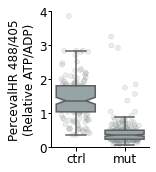

In [ ]:
fig, ax = plt.subplots(figsize=(1.75, 2.5))

tidy_create_strip_box_plot(
    x="genotype",
    y="ratio_mean_int",
    data=df,
    ax=ax,
    y_axis_limit=4,
    y_label="PercevalHR 488/405\n(Relative ATP/ADP)",
    palette=["#95a5a6", "#95a5a6"],
)

In [ ]:
# export
def tidy_create_swarm_box_plot(
    y_axis_start: int = 0,
    y_axis_limit: int = None,
    y_label: str = "set y label",
    **kwargs,
):
    """Creates sns plots. Pass **kwargs to sns.swarmplot and sns.boxplot."""

    ax = sns.swarmplot(
        alpha=0.8, zorder=1, edgecolor="gray", linewidth=0.5, size=5, **kwargs
    )

    ax = sns.boxplot(
        fliersize=0, zorder=0, saturation=0.9, linewidth=1.5, notch=False, **kwargs
    )

    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.5))

    if y_axis_limit != None:
        ax.set_ylim(top=y_axis_limit)

    ax.set_ylim(bottom=y_axis_start)
    ax.set_ylabel(y_label, fontsize=12)
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=1)
    ax.tick_params(axis="both", which="major", pad=1)
    ax.xaxis.set_label_text("")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.setp(ax.spines.values(), linewidth=1)
    sns.despine()

In [ ]:
grouped_df = (
    df.groupby(["genotype", "rep_id"]).agg({"ratio_mean_int": "mean"}).reset_index()
)

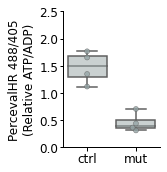

In [ ]:
fig, ax = plt.subplots(figsize=(1.75, 2.5))

tidy_create_swarm_box_plot(
    x="genotype",
    y="ratio_mean_int",
    ax=ax,
    data=grouped_df,
    y_axis_limit=2.5,
    y_label="PercevalHR 488/405\n(Relative ATP/ADP)",
    palette=["#95a5a6", "#95a5a6"],
)

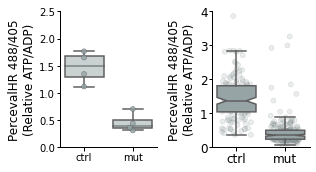

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 2.5), ncols=2)

tidy_create_swarm_box_plot(
    x="genotype",
    y="ratio_mean_int",
    ax=ax[0],
    data=grouped_df,
    y_axis_limit=2.5,
    y_label="PercevalHR 488/405\n(Relative ATP/ADP)",
    palette=["#95a5a6", "#95a5a6"],
)

tidy_create_strip_box_plot(
    x="genotype",
    y="ratio_mean_int",
    ax=ax[1],
    data=df,
    y_axis_limit=4,
    y_label="PercevalHR 488/405\n(Relative ATP/ADP)",
    palette=["#95a5a6", "#95a5a6"],
)
plt.tight_layout()